Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


Please upload an image file (JPG, PNG, etc.):


Saving shutterstock_1095001973.webp to shutterstock_1095001973 (1).webp


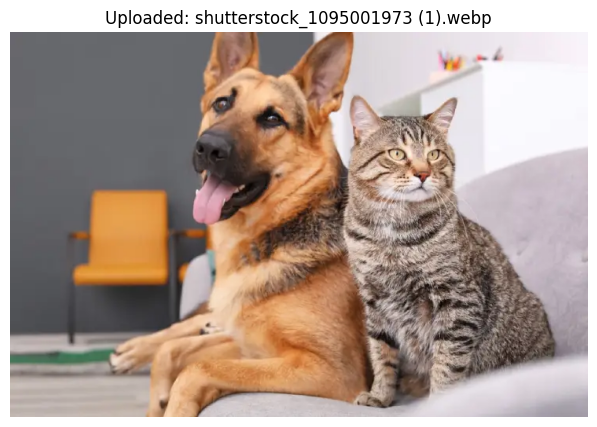

Rank       | Label                          | Confidence
-------------------------------------------------------
1          | German shepherd, German shepherd dog, German police dog, alsatian | 36.97%
2          | Egyptian cat                   | 21.12%
3          | tabby, tabby cat               | 13.96%


In [15]:
# 1. Install necessary libraries
!pip install -q transformers pillow torch

import torch
from transformers import pipeline
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import io

# 2. Initialize the pipeline
# This model is pre-trained to recognize 1,000+ different object types
device = 0 if torch.cuda.is_available() else -1
classifier = pipeline("image-classification",
                      model="google/vit-base-patch16-224",
                      device=device)

def run_classifier():
    # 3. Trigger the file upload widget
    print("Please upload an image file (JPG, PNG, etc.):")
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded.")
        return

    # Get the first file name uploaded
    file_name = list(uploaded.keys())[0]
    img_data = uploaded[file_name]

    # 4. Open and process the image
    img = Image.open(io.BytesIO(img_data)).convert("RGB")

    # Perform inference for Top 3 labels
    results = classifier(img, top_k=3)

    # 5. Visual Output
    plt.figure(figsize=(8, 5))
    plt.imshow(img)
    plt.title(f"Uploaded: {file_name}")
    plt.axis('off')
    plt.show()

    print(f"{'Rank':<10} | {'Label':<30} | {'Confidence'}")
    print("-" * 55)
    for i, res in enumerate(results, 1):
        # Convert score to percentage for readability
        percentage = res['score'] * 100
        print(f"{i:<10} | {res['label']:<30} | {percentage:.2f}%")

# Run the function
run_classifier()